In [ ]:
# Sales Data Analysis: Uncovering Trends and Insights from a Real-World Sales Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     200 non-null    int64         
 1   Date        200 non-null    datetime64[ns]
 2   CustomerID  200 non-null    object        
 3   Product     190 non-null    object        
 4   Quantity    200 non-null    int64         
 5   Price       200 non-null    int64         
 6   Total       194 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 11.1+ KB


In [6]:
df.isnull().sum()

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64

In [7]:
check_missing_values= df[df.isnull().any(axis=1)]

check_missing_values

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
6,7,2024-01-21,C017,NaN,1,1000,975.85
22,23,2024-10-03,C002,Laptop,1,1000,NaN
26,27,2024-09-09,C016,NaN,1,1000,1007.96
28,29,2024-12-10,C009,NaN,2,600,1218.60
35,36,2024-06-23,C003,NaN,1,600,591.78
57,58,2024-09-20,C001,NaN,1,600,612.47
62,63,2024-12-25,C009,NaN,2,1000,2108.75
70,71,2024-02-13,C001,NaN,1,100,96.85
108,109,2024-02-10,C019,Headphones,1,100,NaN
139,140,2024-12-17,C018,Phone,1,600,NaN


In [8]:
df.fillna({"Product": "Unknown_Product", "Total": "Unknown_Total"}, inplace=True)

df.isnull().sum()

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64

In [9]:
df_laptop = df[df['Total'] == 'Unknown_Total']

df_laptop

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
22,23,2024-10-03,C002,Laptop,1,1000,Unknown_Total
108,109,2024-02-10,C019,Headphones,1,100,Unknown_Total
139,140,2024-12-17,C018,Phone,1,600,Unknown_Total
151,152,2024-01-13,C010,Laptop,1,1000,Unknown_Total
173,174,2024-07-08,C006,Laptop,1,1000,Unknown_Total
189,190,2024-05-31,C008,Unknown_Product,1,1000,Unknown_Total


In [10]:
df.rename(columns={'OrderID' : "order_id", 'Date' : 'date', "CustomerID": 'customer_id', "Product":"product", 'Quantity': "quantity", "Price" : 'price', "Total":"total"}, inplace=True)

df


,order_id,date,customer_id,product,quantity,price,total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72


In [18]:
df_group = df.groupby('product')

df_group.groups

{'Headphones': [21, 92, 95, 108, 109, 114, 155, 167, 172], 'Laptop': [1, 4, 5, 13, 15, 16, 17, 18, 19, 20, 22, 23, 29, 32, 33, 46, 52, 53, 54, 55, 56, 58, 60, 63, 66, 68, 76, 77, 81, 84, 85, 88, 89, 90, 91, 94, 99, 100, 103, 106, 110, 120, 121, 123, 125, 129, 132, 135, 137, 138, 140, 148, 151, 157, 158, 161, 164, 165, 166, 169, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 185, 186, 190, 191, 196, 199], 'Monitor': [2, 7, 30, 34, 39, 40, 67, 104, 107, 130, 159, 160, 171, 192, 195], 'Phone': [0, 3, 8, 9, 10, 11, 14, 27, 36, 37, 38, 42, 44, 45, 49, 51, 59, 61, 64, 65, 69, 71, 72, 73, 74, 78, 80, 82, 86, 87, 96, 97, 98, 101, 102, 112, 115, 119, 124, 126, 131, 134, 139, 141, 142, 147, 149, 150, 152, 153, 156, 162, 168, 178, 184, 187, 193, 194, 198], 'Tablet': [12, 24, 25, 31, 41, 43, 47, 48, 50, 75, 79, 83, 93, 105, 111, 113, 116, 117, 118, 122, 127, 128, 133, 136, 143, 144, 145, 146, 154, 170, 197], 'Unknown_Product': [6, 26, 28, 35, 57, 62, 70, 163, 188, 189]}

<Axes: xlabel='customer_id', ylabel='count'>

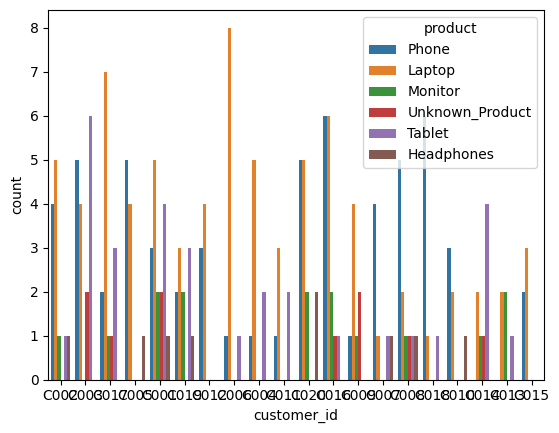

In [132]:
# sns.scatterplot(data=df, x="customer_id", y="quantity", hue="product")

sns.countplot(data=df, x="customer_id", hue="product")

In [20]:
plot1 = df_group['quantity'].sum()
plot1

product
Headphones          12
Laptop             107
Monitor             22
Phone               76
Tablet              42
Unknown_Product     14
Name: quantity, dtype: int64

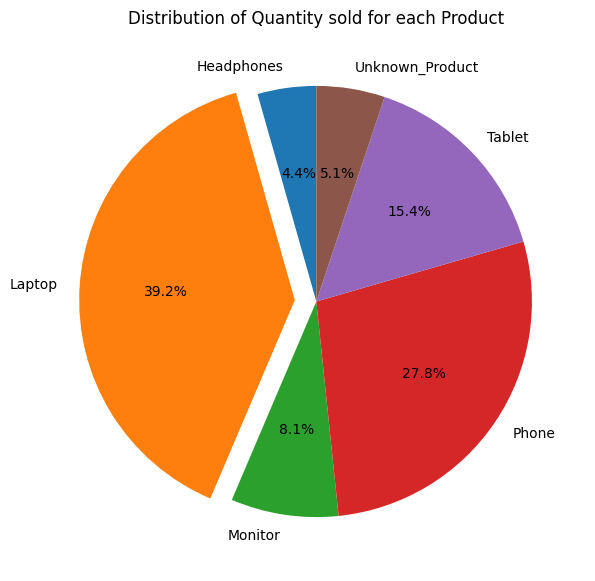

In [51]:
# explode = [0, 0.1, 0, 0, 0, 0]
explode = [0.1 if label == 'Laptop' else 0 for label in plot1.index]


plt.figure(figsize=(7,7))
plt.pie(plot1, labels=plot1.index, autopct='%1.1f%%',  startangle=90, explode=explode)
plt.title("Distribution of Quantity sold for each Product")

plt.show()